In [2]:
# ================================================
# 1️⃣ Import Libraries
# ================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Optional: for better visuals
sns.set(style="whitegrid")


In [4]:
# ================================================
# 2️⃣ Import and Explore the Dataset
# ================================================
# Load dataset
df = pd.read_csv("cust.csv")

# View first few rows
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Basic info about columns and datatypes
df.info()

# Summary statistics
df.describe(include='all').transpose()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# ================================================
# 3️⃣ Handle Missing Values
# ================================================
# Check missing values
missing = df.isnull().sum()
print("Missing Values per Column:\n", missing[missing > 0])

# Strategy: Fill or drop depending on feature type
# Example strategy:
# - Numeric columns: fill with median
# - Categorical columns: fill with mode

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\n✅ Missing values handled successfully!")


Missing Values per Column:
 Series([], dtype: int64)

✅ Missing values handled successfully!


/var/folders/nt/cm9_z_nx5yq0pgqw46gnrd_40000gn/T/ipykernel_7592/3437311270.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/var/folders/nt/cm9_z_nx5yq0pgqw46gnrd_40000gn/T/ipykernel_7592/3437311270.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [10]:
# ================================================
# 4️⃣ Remove Duplicates
# ================================================
duplicates = df.duplicated().sum()
print(f"Number of duplicate records found: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print("✅ Duplicates removed.")


Number of duplicate records found: 0


In [12]:
# ================================================
# 5️⃣ Handle Inconsistent Data / Standardize Formats
# ================================================
# Example: standardize text data (trim spaces, lowercase)
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

print("\n✅ Inconsistent formatting (extra spaces / case) handled.")



✅ Inconsistent formatting (extra spaces / case) handled.


In [14]:
# ================================================
# 6️⃣ Convert Columns to Correct Data Types
# ================================================
# Example conversions (you can adjust these as needed)
# - Convert Yes/No to binary
# - Convert TotalCharges to numeric if it's read as object

if 'totalcharges' in df.columns:
    df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce').fillna(0)

# Convert Yes/No columns to 1/0
binary_map = {'yes': 1, 'no': 0}
for col in df.columns:
    if df[col].nunique() == 2 and set(df[col].unique()) <= set(binary_map.keys()):
        df[col] = df[col].map(binary_map)

df.info()
print("\n✅ Data type corrections complete.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  



📈 Detecting Outliers in Numeric Columns...


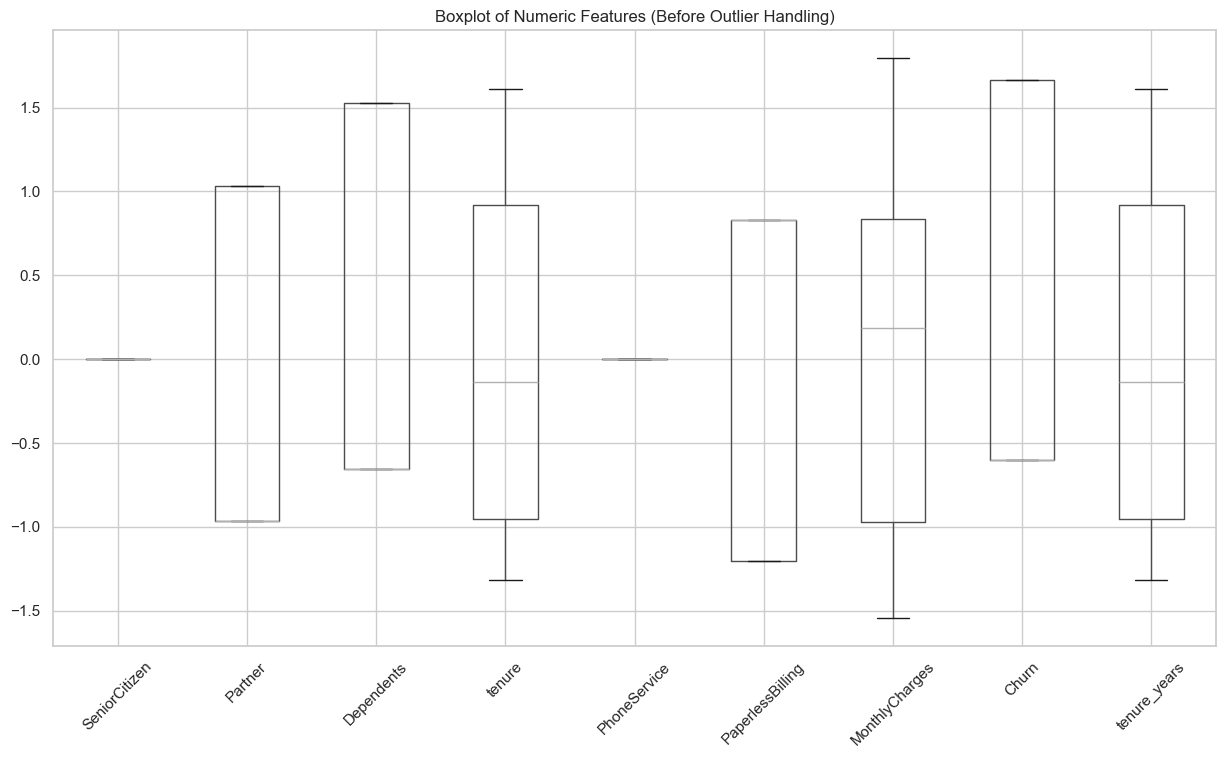

In [26]:
# 7️⃣ Detect & Visualize Outliers (Before Handling)
# -----------------------------
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

print("\n📈 Detecting Outliers in Numeric Columns...")

# Using IQR method
outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = len(outliers)
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} outliers found")

# Boxplots to visualize outliers
plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot()
plt.title("Boxplot of Numeric Features (Before Outlier Handling)")
plt.xticks(rotation=45)
plt.show()



In [28]:
# 8️⃣ Handle Outliers (Optional Step)
# -----------------------------
# You can cap outliers instead of removing them:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

print("\n✅ Outliers handled using IQR capping.")



✅ Outliers handled using IQR capping.


In [18]:
# ================================================
# 8️⃣ Feature Engineering
# ================================================
# Example: create new meaningful features

# tenure in years (if 'tenure' exists in months)
if 'tenure' in df.columns:
    df['tenure_years'] = df['tenure'] / 12

# Average charges per month (if total and monthly charges exist)
if all(x in df.columns for x in ['totalcharges', 'tenure']):
    df['avg_monthly_charge'] = df['totalcharges'] / (df['tenure'] + 1)

# Interaction term example (if 'monthlycharges' and 'tenure' exist)
if all(x in df.columns for x in ['monthlycharges', 'tenure']):
    df['charges_tenure_ratio'] = df['monthlycharges'] / (df['tenure'] + 1)

print("\n✅ New features created successfully!")
df.head()



✅ New features created successfully!


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_years
0,7590-vhveg,female,0,1,0,1,1,no phone service,dsl,no,...,no,no,no,month-to-month,1,electronic check,29.85,29.85,0,0.083333
1,5575-gnvde,male,0,0,0,34,1,no,dsl,yes,...,no,no,no,one year,0,mailed check,56.95,1889.5,0,2.833333
2,3668-qpybk,male,0,0,0,2,1,no,dsl,yes,...,no,no,no,month-to-month,1,mailed check,53.85,108.15,1,0.166667
3,7795-cfocw,male,0,0,0,45,1,no phone service,dsl,yes,...,yes,no,no,one year,0,bank transfer (automatic),42.30,1840.75,0,3.750000
4,9237-hqitu,female,0,0,0,2,1,no,fiber optic,no,...,no,no,no,month-to-month,1,electronic check,70.70,151.65,1,0.166667


In [20]:
# ================================================
# 9️⃣ Normalize or Scale the Data
# ================================================
scaler = StandardScaler()

# Scale only numeric columns (not categorical)
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\n✅ Numeric features scaled using StandardScaler.")



✅ Numeric features scaled using StandardScaler.


In [22]:
# ================================================
# 🔟 Split into Train-Test Sets
# ================================================
# Assuming 'churn' or 'customerchurn' or 'churn_label' is your target variable
target_candidates = [c for c in df.columns if 'churn' in c.lower()]
if target_candidates:
    target = target_candidates[0]
    print(f"✅ Target variable identified: {target}")
else:
    raise ValueError("⚠️ Target column (e.g., 'Churn') not found in dataset.")

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


✅ Target variable identified: Churn
Training set: (5634, 21), Test set: (1409, 21)


In [24]:
# ================================================
# 11️⃣ Export the Cleaned Dataset
# ================================================
cleaned_path = "Cleaned_Telecom_Customer_Churn.csv"
df.to_csv(cleaned_path, index=False)
print(f"✅ Cleaned dataset saved successfully at: {cleaned_path}")


✅ Cleaned dataset saved successfully at: Cleaned_Telecom_Customer_Churn.csv
